In [1]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import sklearn
import datetime
import matplotlib.ticker as mtick

In [4]:
data = pd.read_pickle("df/data_clean.pkl") 
pd.set_option('display.max_columns', 300) # allow us read the full picture of dataframe
print(list(data))

['Department', 'Applicant ID', 'City - Address line 4', 'Programme', 'Latest Decision', 'Latest Decision Date', 'Country of Birth', 'Domicile', 'Nationality', 'Country of Institution', 'Grade on application', 'uob_alum', 'home_oversea', 'master_prev', 'distance', 'Institution', 'Institution_app_num', 'Fee Status', 'School', 'A1 Created date', 'A1 Updated date', 'A2 Created date', 'Decision Date', 'Response Date', 'Days at Admissions Review', 'Days in School', 'Days at Decision Stage', 'Total Days Admissions', 'TOTAL Days', 'Response days', 'decision_since_Sep01', 'A1C_since_Sep01', 'A1U_since_Sep01', 'A2C_since_Sep01', 'Response_since_Sep01', 'funding', 'Decision_C', 'Decision_R', 'Decision_U', 'Status', 'Qual_Name', 'Ielts_Overall', 'Ielts_Listening', 'Ielts_Reading', 'Ielts_Writing', 'Ielts_Speaking', 'Toefl_Overall', 'Toefl_Listening', 'Toefl_Reading', 'Toefl_Writing', 'Toefl_Speaking', 'PTE_Overall', 'PTE_Listening', 'PTE_Reading', 'PTE_Writing', 'PTE_Speaking', 'eng_type', 'multi_

In [5]:
data = data.loc[:,['School', 'Applicant ID', 'Programme', 
                 'uob_alum', 'home_oversea', 'master_prev', 'distance', 'funding', 
                 'A1 Created date', 'A1 Updated date', 'A2 Created date', 'Decision Date', 'Response Date', 
                 'Days at Admissions Review', 'Days in School', 'Days at Decision Stage', 'Total Days Admissions', 'TOTAL Days', 'Response days', 
                 'decision_since_Sep01', 'A1C_since_Sep01', 'A1U_since_Sep01', 'A2C_since_Sep01', 'Response_since_Sep01',                  
                 'Decision_C', 'Decision_R', 'Decision_U', 
                 'eng_type', 'Ielts_Overall', 'Ielts_Listening', 'Ielts_Reading', 'Ielts_Writing', 'Ielts_Speaking', 
                 'Toefl_Overall', 'Toefl_Listening', 'Toefl_Reading', 'Toefl_Writing', 'Toefl_Speaking', 
                 'PTE_Overall', 'PTE_Listening', 'PTE_Reading', 'PTE_Writing', 'PTE_Speaking', 
                  'Institution_app_num',  'Institution_offer_num', 'Insti_weight',
                 'multi_app', 'offered']]
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15604 entries, 0 to 15603
Data columns (total 48 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   School                     15604 non-null  object 
 1   Applicant ID               15604 non-null  int64  
 2   Programme                  15604 non-null  object 
 3   uob_alum                   15604 non-null  int32  
 4   home_oversea               15604 non-null  int32  
 5   master_prev                15604 non-null  int64  
 6   distance                   15604 non-null  float64
 7   funding                    15604 non-null  float64
 8   A1 Created date            15604 non-null  object 
 9   A1 Updated date            15604 non-null  object 
 10  A2 Created date            15604 non-null  object 
 11  Decision Date              15604 non-null  object 
 12  Response Date              15604 non-null  object 
 13  Days at Admissions Review  15604 non-null  flo

In [6]:
print('Shape:', data.shape)
data.describe()

Shape: (15604, 48)


,Applicant ID,uob_alum,home_oversea,master_prev,distance,funding,Days at Admissions Review,Days in School,Days at Decision Stage,Total Days Admissions,TOTAL Days,Response days,decision_since_Sep01,A1C_since_Sep01,A1U_since_Sep01,A2C_since_Sep01,Response_since_Sep01,Decision_C,Decision_R,Decision_U,eng_type,Ielts_Overall,Ielts_Listening,Ielts_Reading,Ielts_Writing,Ielts_Speaking,Toefl_Overall,Toefl_Listening,Toefl_Reading,Toefl_Writing,Toefl_Speaking,PTE_Overall,PTE_Listening,PTE_Reading,PTE_Writing,PTE_Speaking,Institution_app_num,Institution_offer_num,Insti_weight,multi_app,offered
count,1.560400e+04,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000,15604.000000
mean,2.291937e+06,0.007049,0.947706,0.062676,7614.258224,0.031274,51.914701,8.428416,10.559087,62.473789,70.902205,6.723725,216.592412,141.321712,193.223404,78.557806,62.382146,0.544732,0.433222,0.021917,0.437965,2.119117,2.079787,2.060882,1.826455,1.861958,4.450314,1.182966,1.214624,1.106832,1.049955,0.291047,0.288516,0.293066,0.302679,0.307742,15.571905,9.691425,0.569732,1.165470,0.571136
std,1.349957e+05,0.083667,0.222627,0.242387,1698.971119,0.174063,45.676974,17.850726,21.059516,50.897619,54.542051,26.325588,93.531393,101.237268,107.269674,107.259858,114.089683,0.498011,0.495537,0.146419,0.604781,4.338643,3.519269,3.495716,3.129273,3.156544,20.451990,5.642970,5.776548,5.310722,5.017883,4.521261,4.457100,4.529895,4.672272,4.774933,20.750438,14.035537,0.313249,0.472723,0.494930
min,3.305240e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2.277745e+06,0.000000,1.000000,0.000000,8000.000000,0.000000,21.000000,0.000000,0.000000,25.000000,29.000000,0.000000,156.000000,58.000000,129.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.400000,1.000000,0.000000
50%,2.313908e+06,0.000000,1.000000,0.000000,8000.000000,0.000000,45.000000,1.000000,0.000000,53.000000,63.000000,0.000000,226.000000,118.000000,196.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,0.604938,1.000000,1.000000
75%,2.362121e+06,0.000000,1.000000,0.000000,8000.000000,0.000000,79.000000,13.000000,19.250000,90.000000,99.000000,0.000000,287.000000,212.000000,269.000000,168.000000,90.000000,1.000000,1.000000,0.000000,1.000000,6.000000,6.000000,6.000000,5.500000,5.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,13.000000,0.777778,1.000000,1.000000
max,2.533710e+06,1.000000,1.000000,1.000000,16771.762215,1.000000,743.000000,478.000000,480.000000,747.000000,753.000000,442.000000,650.000000,668.000000,673.000000,592.000000,673.000000,1.000000,1.000000,1.000000,3.000000,112.000000,68.000000,68.000000,73.000000,72.000000,193.000000,120.000000,118.000000,119.000000,117.000000,90.000000,90.000000,90.000000,90.000000,90.000000,118.000000,94.000000,1.000000,5.000000,1.000000


## 1. Correlation between the columns (looking for redundancy)

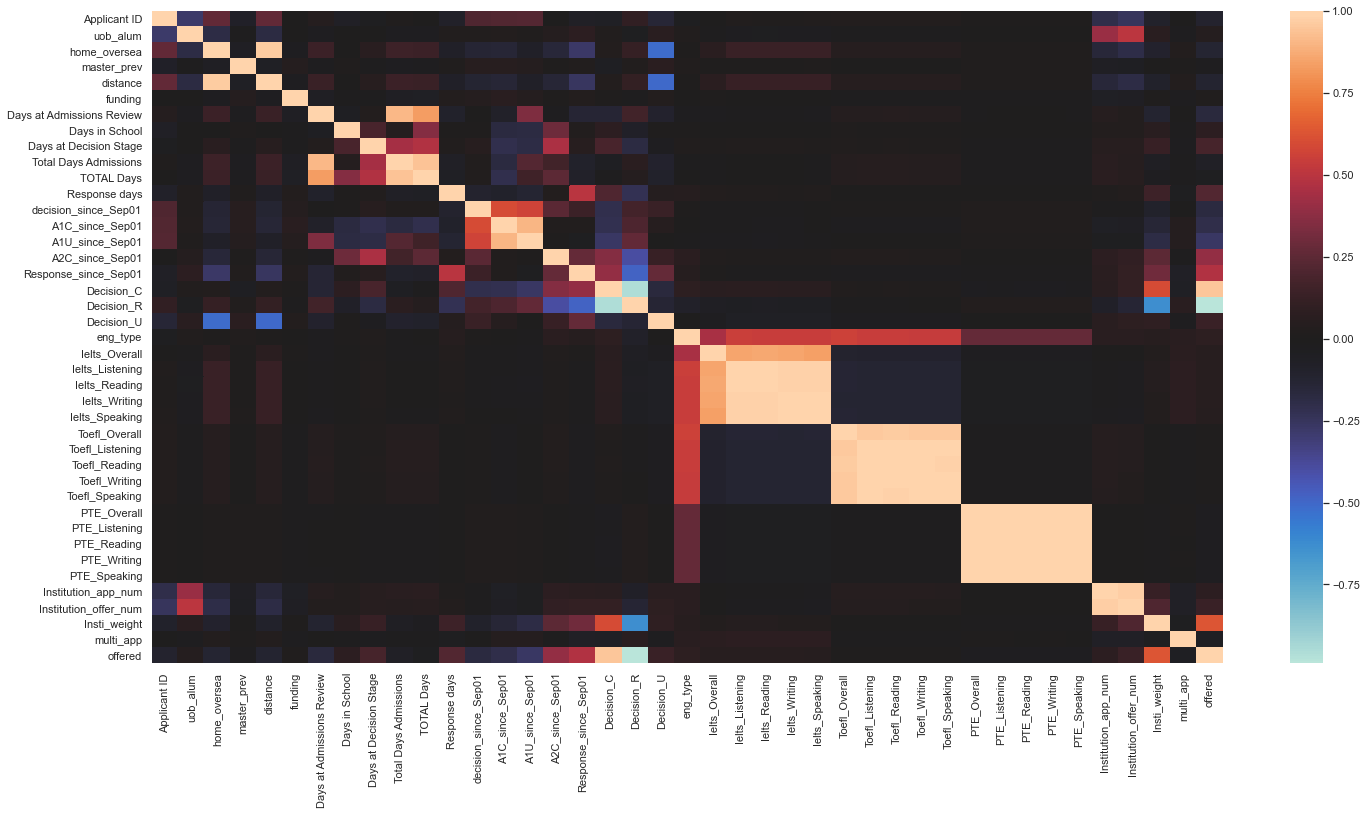

In [9]:
correlation = data.corr()
sns.set(rc = {'figure.figsize':(24,12)})
ax = sns.heatmap(correlation, center=0)
ax.figure.savefig("off/correlation.png") 

## 2. Compare the turnover days distribution of accepted/no accepted

### 1) Acceptance Rate vs Total days 

In [10]:
turnover = data.loc[(data['TOTAL Days'] < 200)&(data['TOTAL Days'] >0)]
turnover = turnover.loc[:,['TOTAL Days','Applicant ID','offered','Decision Date','A1 Created date',"Response days"]]
group_by_days= turnover.groupby('TOTAL Days', as_index=False)
days_count = group_by_days['Applicant ID'].count()

offered = turnover.loc[turnover['offered']== 1]
group_by_days_offered= offered.groupby('TOTAL Days', as_index=False)
offered_count = group_by_days_offered['Applicant ID'].count()

days_count = days_count.merge(offered_count, how='left', on='TOTAL Days')
days_count = days_count.rename(columns={"Applicant ID_y": "offered_count", "Applicant ID_x": "total_count"})
days_count['offered_rate'] = ''
days_count.eval('offered_rate = offered_count / total_count', inplace=True)
days_count = days_count.fillna(0)
days_count

,TOTAL Days,total_count,offered_count,offered_rate
0,1.0,85,53.0,0.623529
1,2.0,55,24.0,0.436364
2,3.0,68,28.0,0.411765
3,4.0,118,46.0,0.389831
4,5.0,134,49.0,0.365672
...,...,...,...,...
194,195.0,5,2.0,0.400000
195,196.0,4,1.0,0.250000
196,197.0,5,1.0,0.200000
197,198.0,5,3.0,0.600000


In [14]:
The offer rate verse totay days

SyntaxError: invalid syntax (<ipython-input-14-98fe932ab19d>, line 1)

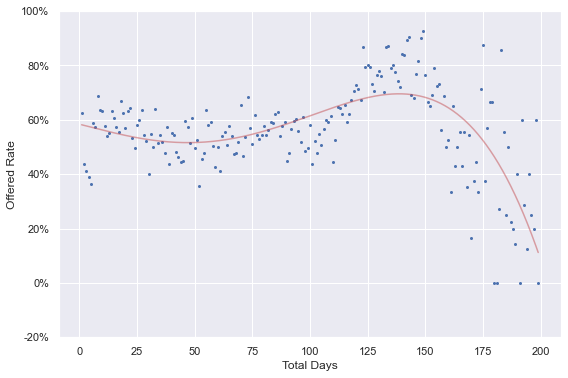

In [11]:
x=days_count["TOTAL Days"]
y=days_count["offered_rate"]

a, b, c, d, e = np.polyfit(x, y, 4)
fit_equation = lambda x: a * x**4 + b * x**3 + c * x**2 + d * x + e


X_fit = np.linspace(min(x), max(x), 1000)
Y_fit = fit_equation(X_fit)

fig, ax1 = plt.subplots()
ax1.plot(X_fit, Y_fit, color='r', alpha=0.5)
ax1.scatter(x, y, s=4, color='b')
fig.set_size_inches(9,6)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
plt.xlabel('Total Days')
plt.ylabel('Offered Rate')
plt.show()
ax1.figure.savefig('off/total_days_lmplot.png')



#sns.lmplot(data=days_count, x="TOTAL Days", y="offered_rate", height=6, aspect=1.5)
#
#plt.plot(x, exponential_fit(x, *fitting_parameters), '-', label='Fit')
#plt.show()


The offer/reject distribution on totay days

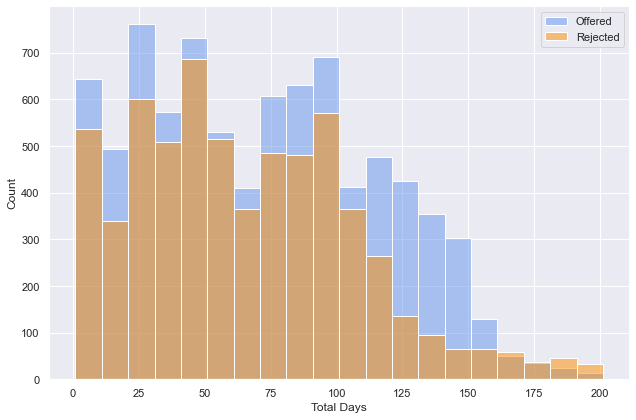

In [13]:
colors = {0: 'darkorange', 1: 'cornflowerblue'} 
ax = sns.displot(turnover, x="TOTAL Days", hue="offered", binwidth=10, palette=colors, height=6, aspect=1.5, legend=False)
plt.legend(labels=["Offered","Rejected"])
ax.set(xlabel='Total Days')
ax.savefig("off/total_days_histo.png") 
#if the python version was different, the save might need to change into below
#ax.figure.savefig("off/total_days_histo.png") 

### Conclusion: The offered possibility and the length of the period have a curve relationship

### 2)The offer/reject distribution on the start date and decision date of the application

Distribution of offer/Rejected Applicant Numbers over Student Application Start Date

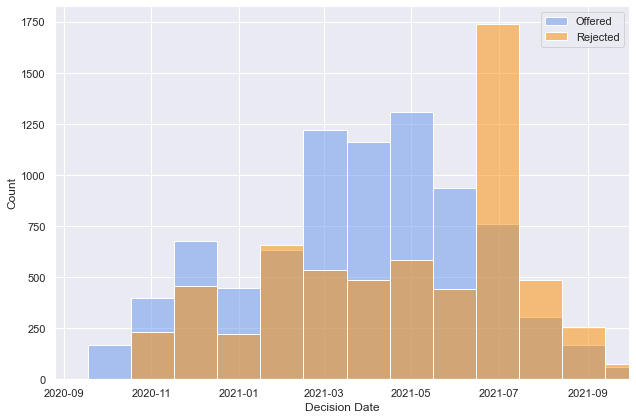

In [18]:
ax = sns.displot(turnover, x='Decision Date', hue="offered", binwidth=30, height = 6,palette=colors, aspect = 1.5, legend=False).set(xlim=(18500, 18900))
plt.legend(labels=["Offered","Rejected"])
ax.savefig("off/decision_date_histo.png") 
#if the python version was different, the save might need to change into below
#ax.figure.savefig("off/decision_date_histo.png") 

Distribution of Offer/Rejected Applicant Numbers over Student Application Decision Date

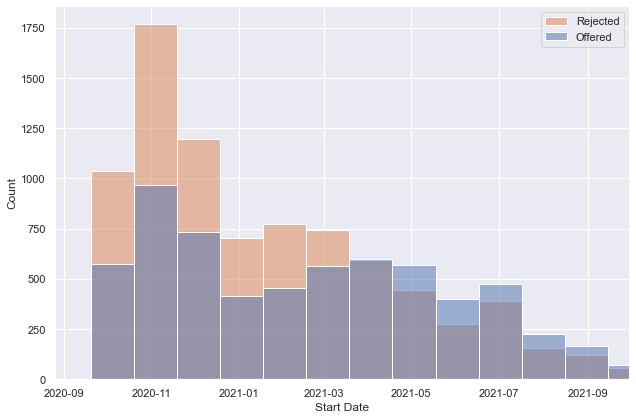

In [19]:
colors = {0: 'darkorange', 1: 'cornflowerblue'} 
ax = sns.displot(turnover, x='A1 Created date', hue="offered", binwidth=30, height = 6, aspect = 1.5, legend=False).set(xlim=(18500, 18900))
plt.legend(labels=["Rejected","Offered"])
ax.set(xlabel='Start Date')
ax.savefig("off/start_date_histo.png") 
#if the python version was different, the save might need to change into below
#ax.figure.savefig("off/start_date_histo.png") 

### Conclusion\; Later applicants are more likely to have offer

## 3. English distribution in different test

In [20]:
ielts = data.loc[(data['Ielts_Overall'] > 3) & (data['Ielts_Overall'] < 9) ]
ielts = ielts.loc[:,['Ielts_Overall','Applicant ID','offered']]
group_by_ielts = ielts.groupby('Ielts_Overall', as_index=False)
ielts_count = group_by_ielts['Applicant ID'].count()

offered = ielts.loc[ielts['offered']== 1]
group_by_ielts_offered= offered.groupby('Ielts_Overall', as_index=False)
offered_count = group_by_ielts_offered['Applicant ID'].count()

ielts_count = ielts_count.merge(offered_count, how='left', on='Ielts_Overall')
ielts_count = ielts_count.rename(columns={"Applicant ID_y": "offered_count", "Applicant ID_x": "total_count"})
ielts_count['offered_rate'] = ''
ielts_count.eval('offered_rate = offered_count / total_count', inplace=True)
ielts_count = ielts_count.fillna(0)
ielts_count

,Ielts_Overall,total_count,offered_count,offered_rate
0,4.5,10,5,0.500000
1,5.0,36,24,0.666667
2,5.5,241,158,0.655602
3,6.0,948,605,0.638186
4,6.5,1214,709,0.584020
5,7.0,1015,606,0.597044
6,7.5,590,354,0.600000
7,8.0,337,208,0.617211
8,8.5,38,26,0.684211


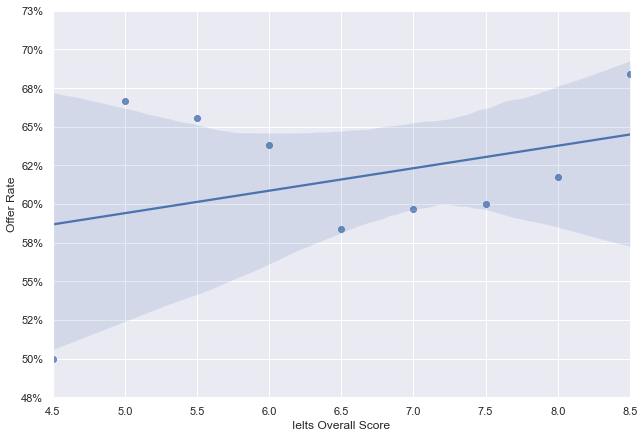

In [23]:
ax1 = sns.lmplot(data = ielts_count, x="Ielts_Overall", y="offered_rate", height=6, aspect=1.5)
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
ax1.set(xlabel='Ielts Overall Score', ylabel='Offer Rate')
ax1.savefig('off/ielts_lmplot.png')

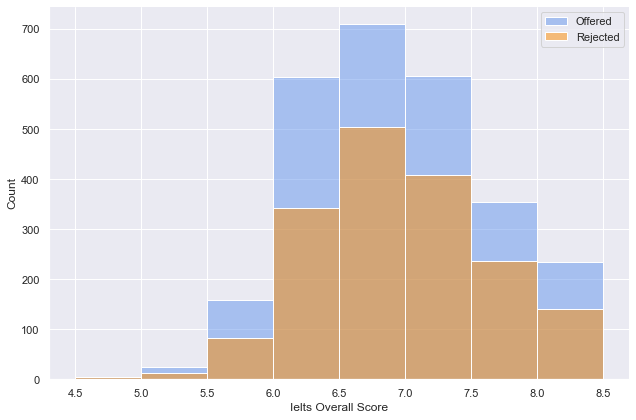

In [24]:
ax2 = sns.displot(ielts, x="Ielts_Overall", hue="offered", binwidth=0.5, palette=colors, height=6, aspect=1.5, legend=False)
plt.legend(labels=["Offered","Rejected"])
ax2.set(xlabel='Ielts Overall Score')
ax2.savefig('off/ielts_histo.png')

In [25]:
toefl = data.loc[(data['Toefl_Overall'] > 75) & (data['Toefl_Overall'] < 121) ]
toefl = toefl.loc[:,['Toefl_Overall','Applicant ID','offered']]
group_by_toefl = toefl.groupby('Toefl_Overall', as_index=False)
toefl_count = group_by_toefl['Applicant ID'].count()

offered = toefl.loc[toefl['offered']== 1]
group_by_toefl_offered= offered.groupby('Toefl_Overall', as_index=False)
offered_count = group_by_toefl_offered['Applicant ID'].count()

toefl_count = toefl_count.merge(offered_count, how='left', on='Toefl_Overall')
toefl_count = toefl_count.rename(columns={"Applicant ID_y": "offered_count", "Applicant ID_x": "total_count"})
toefl_count['offered_rate'] = ''
toefl_count.eval('offered_rate = offered_count / total_count', inplace=True)
toefl_count = toefl_count.fillna(0)

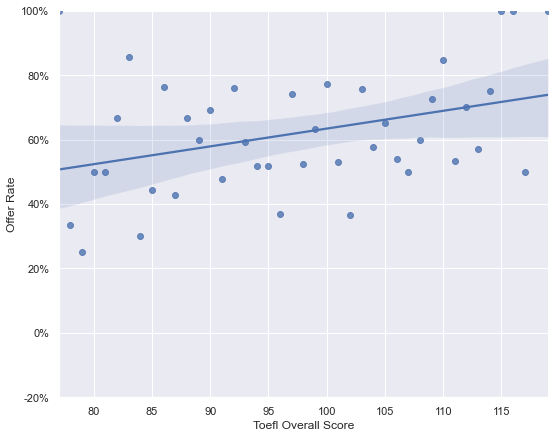

In [27]:
ax3 = sns.lmplot(data = toefl_count, x="Toefl_Overall", y="offered_rate", height=6, aspect=1.25).set(ylim=(-0.01, 1))
plt.yticks(plt.yticks()[0], ['{:,.0%}'.format(x) for x in plt.yticks()[0]])
ax3.set(xlabel='Toefl Overall Score', ylabel='Offer Rate')
ax3.savefig('off/toefl_lmplot.png')

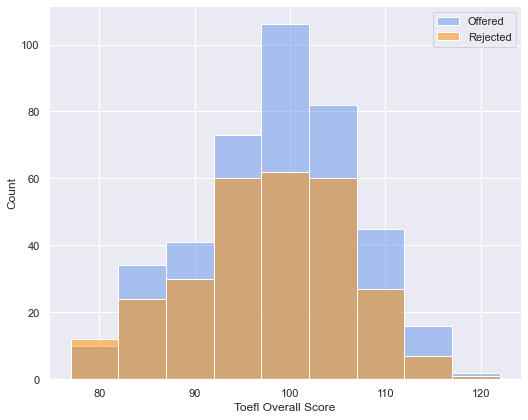

In [28]:
colors = {0: 'darkorange', 1: 'cornflowerblue'} 
ax4 = sns.displot(toefl, x="Toefl_Overall", hue="offered", binwidth=5, palette=colors, height=6, aspect=1.25, legend=False)
plt.legend(labels=["Offered","Rejected"])
ax4.set(xlabel='Toefl Overall Score')
ax4.savefig('off/toefl_histo.png')

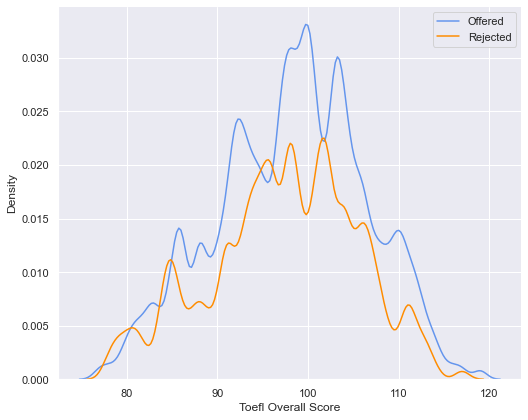

In [29]:
# try to see if a curve graph is better than histogram
ax4 = sns.displot(toefl, x="Toefl_Overall", hue="offered", kind="kde", bw_adjust=.30 , palette=colors, height=6, aspect=1.25, legend=False)
plt.legend(labels=["Offered","Rejected"])
ax4.set(xlabel='Toefl Overall Score')

## 4. Home Student Distance
Although the officer may not take this factor into their account in the reviewing, we processed this part with the same methodology as in the exploration-accept.

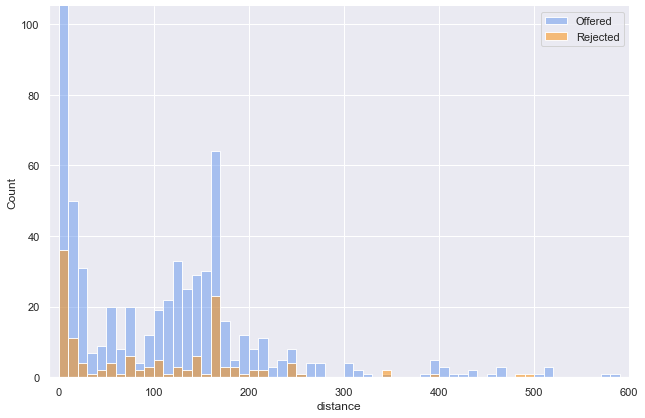

In [33]:
colors = {0: 'darkorange', 1: 'cornflowerblue'} 
home = data.loc[(data['distance'] < 600)]
ax = sns.displot(home, x='distance', hue="offered", binwidth=10, palette=colors, height = 6, aspect = 1.5, legend=False).set(xlim=(-10, 600), ylim=(0,105))
plt.legend(labels=["Offered","Rejected"])
ax.savefig('off/home_distance.png')

we could see the offer/reject ratios keep the same at different distances. Therefore, this feature might hardly have an impact on the target variable.

## 5. School Offer Rate

In [34]:
dep = data.loc[:,['School','Applicant ID','offered']]
group_by_dep = dep.groupby('School', as_index=False)
dep_count = group_by_dep['Applicant ID'].count()

offered = dep.loc[dep['offered']== 1]
group_by_dep_offered= offered.groupby('School', as_index=False)
offered_count = group_by_dep_offered['Applicant ID'].count()

dep_count = dep_count.merge(offered_count, how='left', on='School')
dep_count = dep_count.rename(columns={"Applicant ID_y": "offered_count", "Applicant ID_x": "total_count"})
dep_count['offered_rate'] = ''
dep_count.eval('offered_rate = offered_count / total_count', inplace=True)
dep_count = dep_count.fillna(0)
dep_count = dep_count.sort_values(by=['offered_rate'])
dep_count.to_csv('off/dep_count.csv')
dep_count

,School,total_count,offered_count,offered_rate
0,0,2,0.0,0.000000
4,Computer Science,7189,3104.0,0.431771
7,Mathematics,1219,548.0,0.449549
8,Mechanical Engineering,592,373.0,0.630068
1,Business School,1397,980.0,0.701503
2,Chemical Engineering,1122,801.0,0.713904
3,Civil Engineering,1324,968.0,0.731118
9,Metallurgy and Materials,507,382.0,0.753452
6,Elec Elec and System Eng;Elec Elec and Sys Eng...,1240,939.0,0.757258
11,School of Engineering;Elec Elec and Sys Engine...,544,417.0,0.766544


ax = sns.barplot(x="School", y="offered_rate", data=dep_count)

## 6. Other features

In [35]:
offered = data.loc[data['offered'] == 1]
#reject = data.loc[ielts['accepted']== 0]

group_by_multi_app = data.groupby(['multi_app'])
multi_app_count = group_by_multi_app['Applicant ID'].count().to_frame()
group_by_multi_app_accept = offered.groupby(['multi_app'])
multi_app_count_accept = group_by_multi_app_accept['Applicant ID'].count().to_frame()
multi_app_count = multi_app_count.merge(multi_app_count_accept, how='left', on='multi_app')
multi_app_count = multi_app_count.rename(columns={"Applicant ID_y": "offer_count", "Applicant ID_x": "total_count"})
multi_app_count['offer_rate'] = ''
multi_app_count = multi_app_count.fillna(0)
multi_app_count.eval('offer_rate = offer_count / total_count', inplace=True)

multi_app_count.to_csv('off/multi_app.csv')
multi_app_count

,total_count,offer_count,offer_rate
multi_app,,,
1,13534,7816,0.577508
2,1682,917,0.545184
3,294,146,0.496599
4,64,21,0.328125
5,30,12,0.400000


In [36]:
group_by_funding = data.groupby(['funding'])
funding_count = group_by_funding['Applicant ID'].count().to_frame()
group_by_funding_accept = offered.groupby(['funding'])
funding_count_accept = group_by_funding_accept['Applicant ID'].count().to_frame()
funding_count = funding_count.merge(funding_count_accept, how='left', on='funding')
funding_count = funding_count.rename(columns={"Applicant ID_y": "offer_count", "Applicant ID_x": "total_count"})
funding_count['offer_rate'] = ''
funding_count = funding_count.fillna(0)
funding_count.eval('offer_rate = offer_count / total_count', inplace=True)

funding_count.to_csv('off/funding.csv')
funding_count

,total_count,offer_count,offer_rate
funding,,,
0.0,15116,8616,0.569992
1.0,488,296,0.606557


In [37]:
group_by_alum = data.groupby(['uob_alum'])
alum_count = group_by_alum['Applicant ID'].count().to_frame()
group_by_alum_accept = offered.groupby(['uob_alum'])
alum_count_accept = group_by_alum_accept['Applicant ID'].count().to_frame()
alum_count = alum_count.merge(alum_count_accept, how='left', on='uob_alum')
alum_count = alum_count.rename(columns={"Applicant ID_y": "offer_count", "Applicant ID_x": "total_count"})
alum_count['offer_rate'] = ''
alum_count = alum_count.fillna(0)
alum_count.eval('offer_rate = offer_count / total_count', inplace=True)

alum_count.to_csv('off/alum_count.csv')
alum_count



,total_count,offer_count,offer_rate
uob_alum,,,
0,15494,8822,0.569382
1,110,90,0.818182


In [38]:
group_by_home = data.groupby(['home_oversea'])
home_count = group_by_home['Applicant ID'].count().to_frame()
group_by_home_accept = offered.groupby(['home_oversea'])
home_count_accept = group_by_home_accept['Applicant ID'].count().to_frame()
home_count = home_count.merge(home_count_accept, how='left', on='home_oversea')
home_count = home_count.rename(columns={"Applicant ID_y": "offer_count", "Applicant ID_x": "total_count"})
home_count['offer_rate'] = ''
home_count = home_count.fillna(0)
home_count.eval('offer_rate = offer_count / total_count', inplace=True)

home_count.to_csv('off/home_count.csv')
home_count


,total_count,offer_count,offer_rate
home_oversea,,,
0,816,674,0.825980
1,14788,8238,0.557073


In [39]:
group_by_master = data.groupby(['master_prev'])
master_count = group_by_master['Applicant ID'].count().to_frame()
group_by_master_accept = offered.groupby(['master_prev'])
master_count_accept = group_by_master_accept['Applicant ID'].count().to_frame()
master_count = master_count.merge(master_count_accept, how='left', on='master_prev')
master_count = master_count.rename(columns={"Applicant ID_y": "offer_count", "Applicant ID_x": "total_count"})
master_count['offer_rate'] = ''
master_count = master_count.fillna(0)
master_count.eval('offer_rate = offer_count / total_count', inplace=True)

master_count.to_csv('off/master_count.csv')
master_count


,total_count,offer_count,offer_rate
master_prev,,,
0,14626,8397,0.574115
1,978,515,0.526585


group_by_country = data.groupby(['Nationality','offered'])
country_count = group_by_country['Applicant ID'].count()
country_count